In [ ]:
import scipy as scp
from numpy import random
from numpy import linalg

ncity = 100

# ncity 개의 도시에 대해 2D 랜덤 좌표 생성
R = random.random((ncity, 2))
city = range(ncity)

In [ ]:
def Distance(R1, R2):
    """
    두 점 R1과 R2 사이의 유클리드 거리를 계산하는 함수

    Parameters:
    - R1 (numpy.ndarray): 첫 번째 점의 좌표 벡터
    - R2 (numpy.ndarray): 두 번째 점의 좌표 벡터

    Returns:
    - float: 두 점 사이의 유클리드 거리
    """
    return linalg.norm(R1 - R2)

def TotalDistance(city, R):
    """
    주어진 도시 순서에 따른 전체 경로의 거리를 계산하는 함수

    Parameters:
    - city (list): 도시의 방문 순서를 나타내는 리스트
    - R (numpy.ndarray): 각 도시의 2D 좌표를 포함한 배열

    Returns:
    - float: 주어진 순서대로 방문할 때의 전체 경로 거리
    """
    dist = 0
    for i in range(len(city) - 1):
        dist += Distance(R[city[i]], R[city[i + 1]])
    dist += Distance(R[city[-1]], R[city[0]])  # 마지막에서 첫 번째로 돌아오는 거리도 계산
    return dist


In [ ]:
def Plot(city, R, dist):
    """
    주어진 도시 순서와 좌표로 경로를 시각화하는 함수

    Parameters:
    - city (list): 도시의 방문 순서를 나타내는 리스트
    - R (numpy.ndarray): 각 도시의 2D 좌표를 포함한 배열
    - dist (float): 전체 경로의 거리

    도시 순서와 해당하는 좌표를 이용해 경로를 시각화합니다. 경로의 시작점과 끝점을 연결하는 선으로 표시하며,
    각 도시의 좌표는 점으로 나타냄
    그래프의 제목은 전체 경로의 거리로 설정
    """
    Pt = [R[city[i]] for i in range(len(city))]
    Pt += [R[city[0]]]  # 경로를 닫기 위해 처음 도시의 좌표를 다시 추가
    Pt = array(Pt)
    title('Total distance=' + str(dist))  # 그래프 제목 설정
    plot(Pt[:, 0], Pt[:, 1], 'o-')  # 좌표를 점으로 표시하고, 점을 선으로 연결하여 경로를 나타냄
    show()  # 그래프 출력


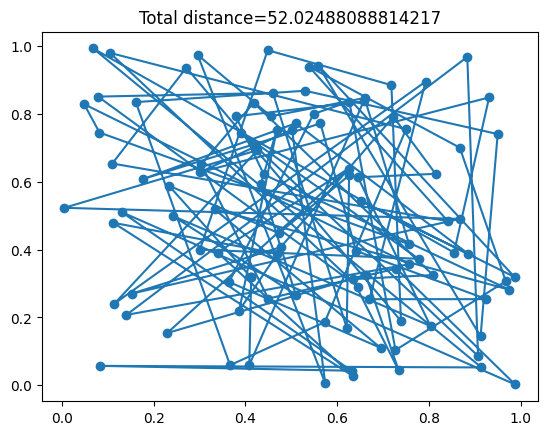

In [ ]:
from pylab import *
Plot(city,R, TotalDistance(city,R))

In [ ]:
def CostSwap(R, city, n, ncity):
    """
    도시 순회 경로에서 두 인접한 도시를 교환하여 발생하는 거리 변경량(비용)을 계산

    Parameters:
    - R (numpy.ndarray): 도시 좌표 배열
    - city (list): 순회 경로에서 도시 순서를 나타내는 리스트
    - n (int): 교환할 첫 번째 도시의 인덱스
    - ncity (int): 전체 도시 수

    Returns:
    - float: 교환을 수행했을 때 거리(비용)의 변화량
    """

    # 인접한 도시들의 인덱스 계산
    n1 = (n + 1) % ncity  # n 다음의 도시
    n2 = (n - 1) % ncity  # n 이전의 도시
    n3 = (n1 + 1) % ncity  # n 다음 다음의 도시

    # 교환 전후의 거리 계산
    before_de = Distance(R[city[n2]], R[city[n]]) + Distance(R[city[n1]], R[city[n3]])
    after_de = Distance(R[city[n2]], R[city[n1]]) + Distance(R[city[n]], R[city[n3]])
    return after_de - before_de

def Swap(city, n, ncity):
    """
    도시 순회 경로에서 두 인접한 도시를 교환

    Parameters:
    - city (list): 현재 도시 순회 경로의 순서를 나타내는 리스트
    - n (int): 교환할 첫 번째 도시의 인덱스
    - ncity (int): 전체 도시 수

    Returns:
    - list: 교환된 도시 순회 경로를 나타내는 리스트
    """

    swapcity = city.copy()
    swapcity[n], swapcity[(n + 1) % ncity] = swapcity[(n + 1) % ncity], swapcity[n]
    return swapcity

In [ ]:
def TravelingSalesman(city, R, maxSteps, maxAccepted, Tstart, fCool, maxTsteps):
    """
    모의 담금질 기법을 사용하여 주어진 도시 순회 문제의 최적 경로를 찾음

    Parameters:
    - city (list): 초기 도시 순회 경로의 순서를 나타내는 리스트
    - R (numpy.ndarray): 도시들의 좌표를 포함하는 2D 배열
    - maxSteps (int): 각 온도 단계에서의 시도 횟수 상한
    - maxAccepted (int): 각 온도 단계에서 허용할 교환 수 상한
    - Tstart (float): 초기 온도
    - fCool (float): 냉각 비율 계수
    - maxTsteps (int): 최대 온도 단계 수

    Returns:
    - list: 최적 경로를 나타내는 도시 순회 경로 리스트
    """

    T = Tstart  # 초기 온도 설정
    dist = TotalDistance(city, R)  # 초기 경로의 총 거리 계산

    for t in range(maxTsteps):
        accepted = 0
        for i in range(maxSteps):
            # 두 도시를 교환하여 발생하는 비용 계산
            n = random.randint(0, ncity - 1)
            de = CostSwap(R, city, n, ncity)

            # 교환을 수행할지 결정
            if de < 0 or np.exp(-de / T) > np.random.rand():
                accepted += 1
                dist += de
                city = Swap(city, n, ncity)

            # 허용된 교환 횟수를 초과하면 중단
            if accepted > maxAccepted:
                break

        T *= fCool  # 온도 감소
        Plot(city, R, dist)  # 현재 경로를 시각화하여 플롯 출력
        print("T=%10.5f , distance=%10.5f acc.steps=%d" % (T, dist, accepted))

        if accepted == 0:
            break

        Plot(city, R, dist)  # 교환 후 경로를 시각화하여 플롯 출력

    return city  # 최적 경로를 나타내는 도시 순회 경로 반환

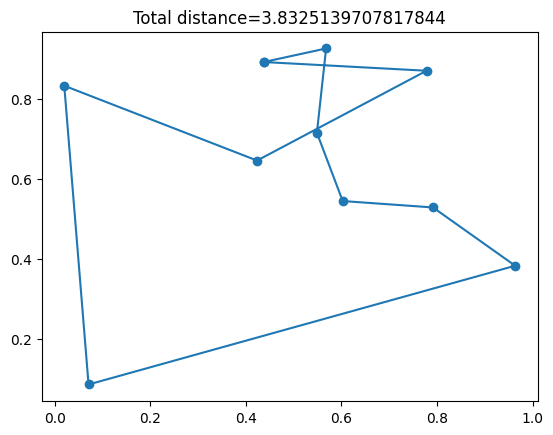

T=   0.18000 , distance=   3.83251 acc.steps=101


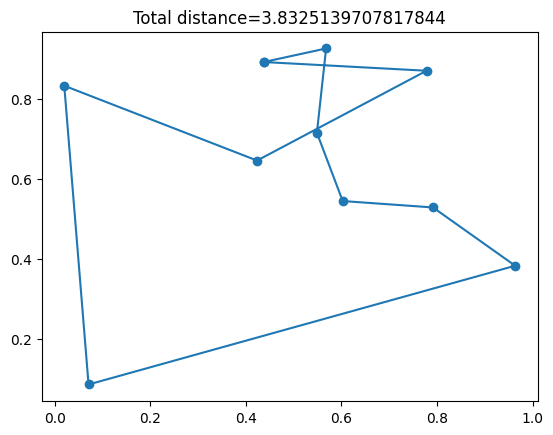

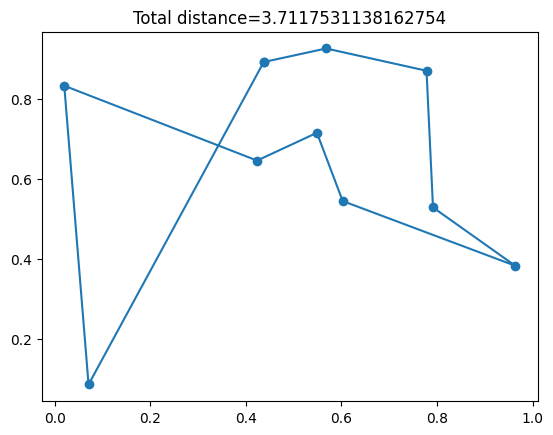

T=   0.16200 , distance=   3.71175 acc.steps=101


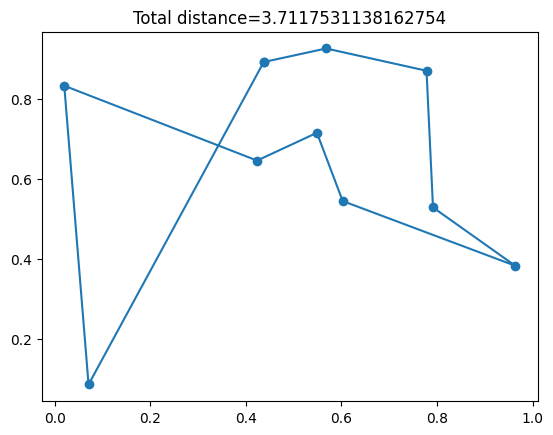

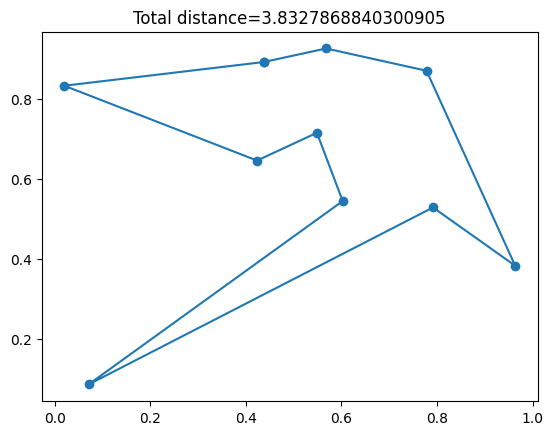

T=   0.14580 , distance=   3.83279 acc.steps=101


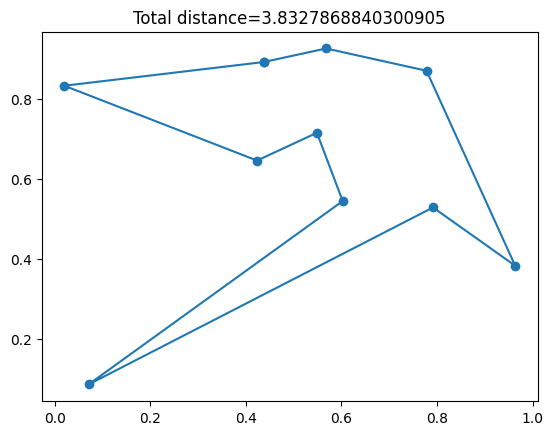

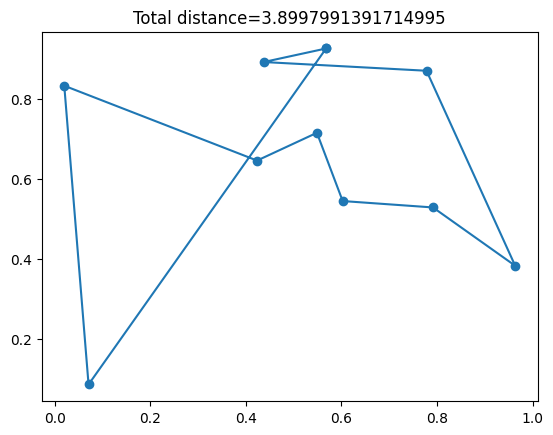

T=   0.13122 , distance=   3.89980 acc.steps=101


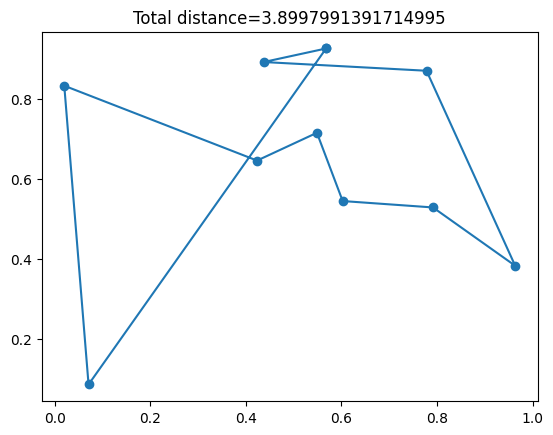

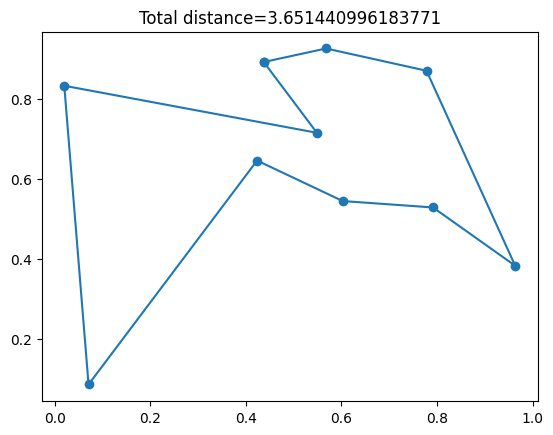

T=   0.11810 , distance=   3.65144 acc.steps=101


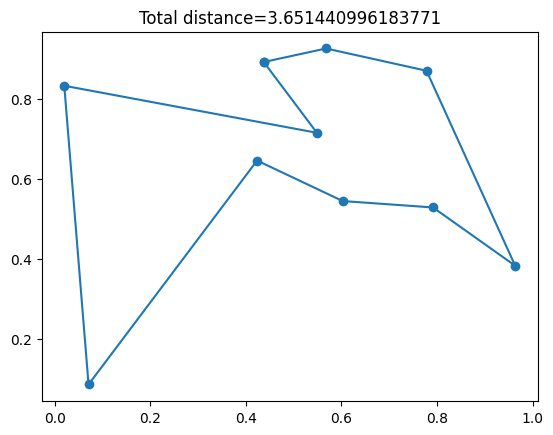

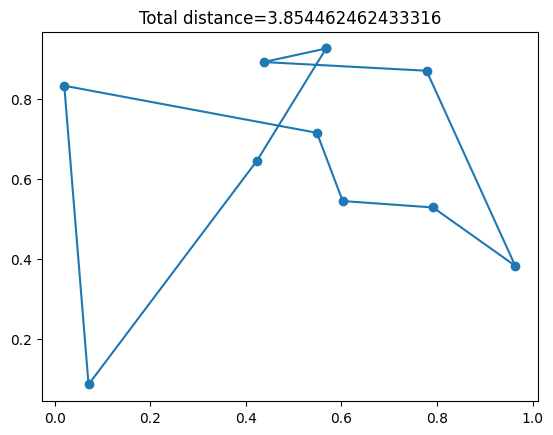

T=   0.10629 , distance=   3.85446 acc.steps=101


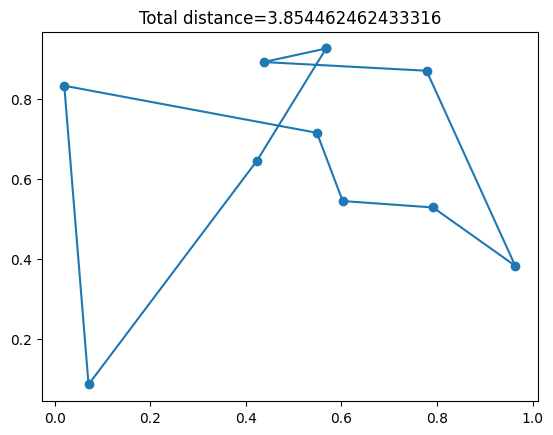

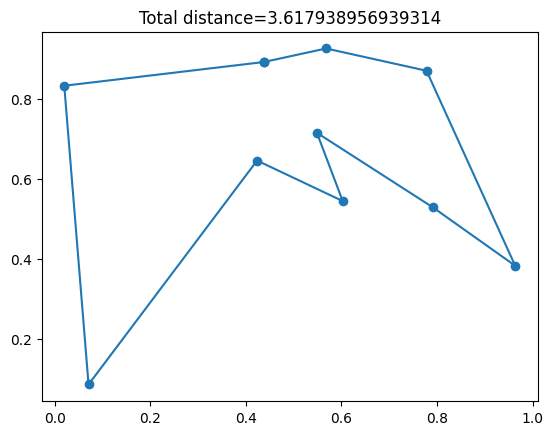

T=   0.09566 , distance=   3.61794 acc.steps=101


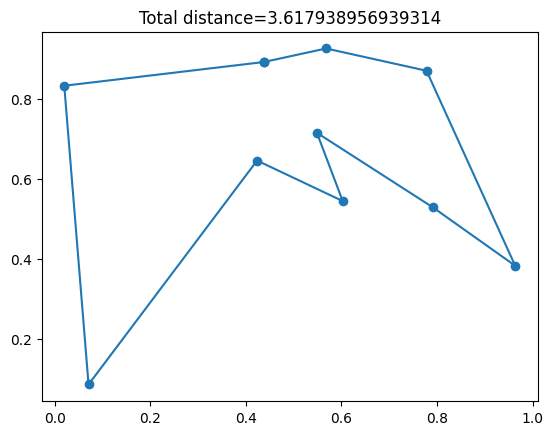

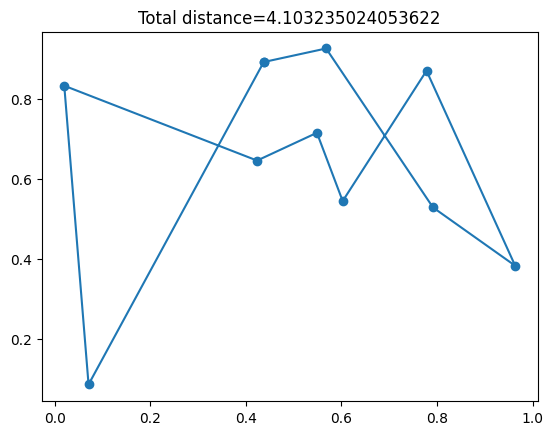

T=   0.08609 , distance=   4.10324 acc.steps=101


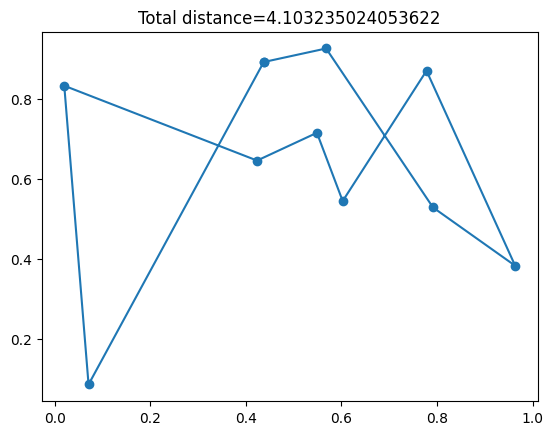

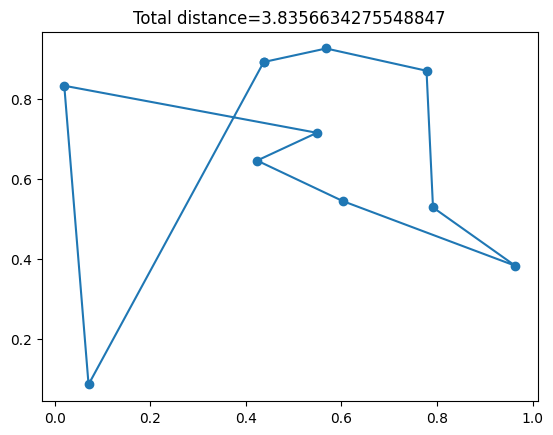

T=   0.07748 , distance=   3.83566 acc.steps=101


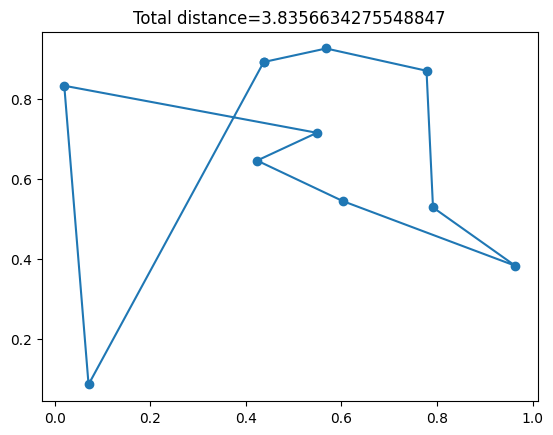

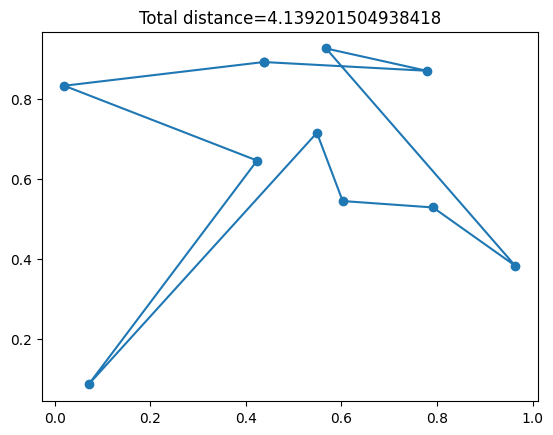

T=   0.06974 , distance=   4.13920 acc.steps=101


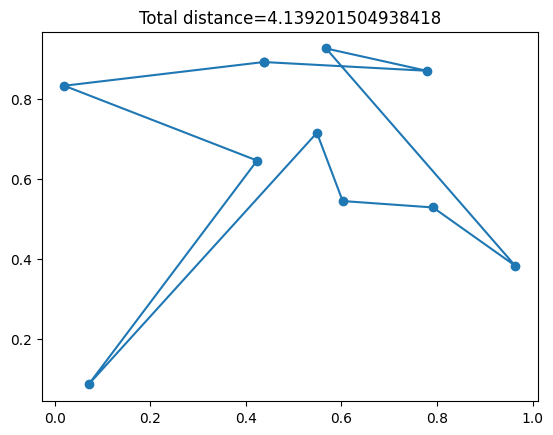

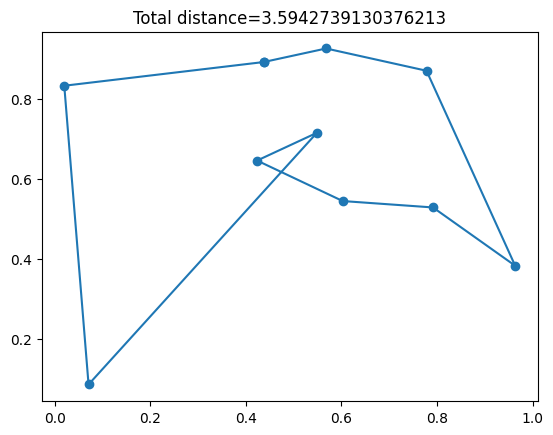

T=   0.06276 , distance=   3.59427 acc.steps=101


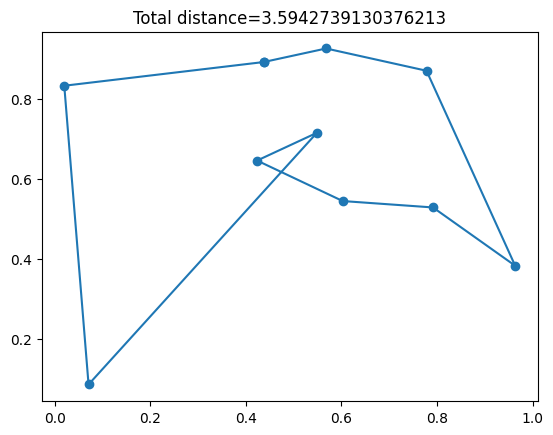

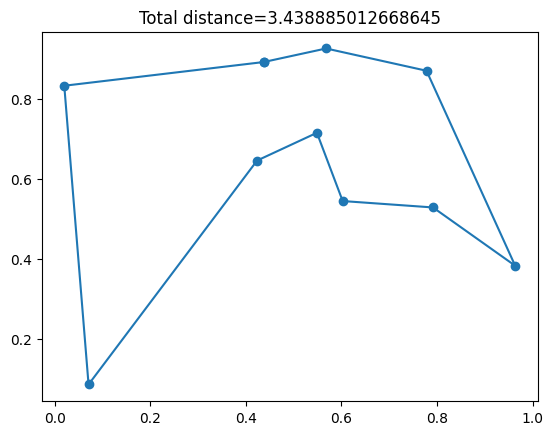

T=   0.05649 , distance=   3.43889 acc.steps=101


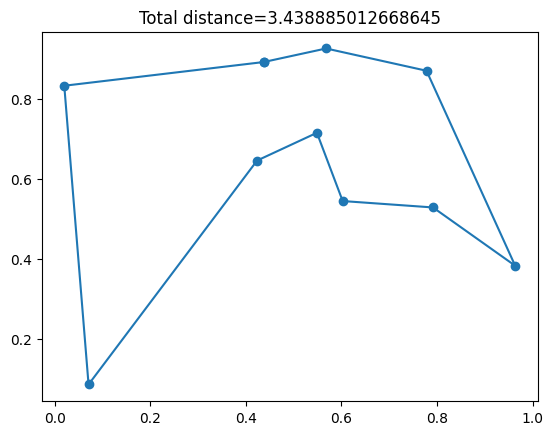

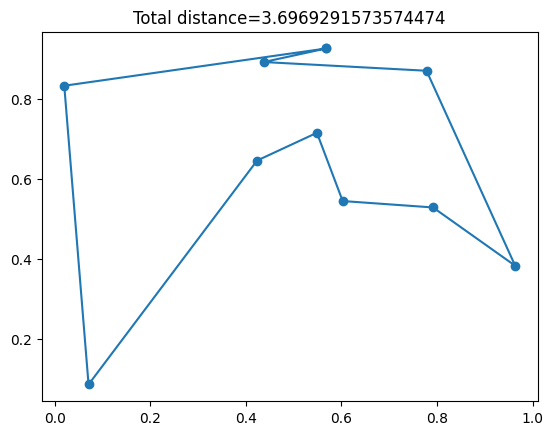

T=   0.05084 , distance=   3.69693 acc.steps=101


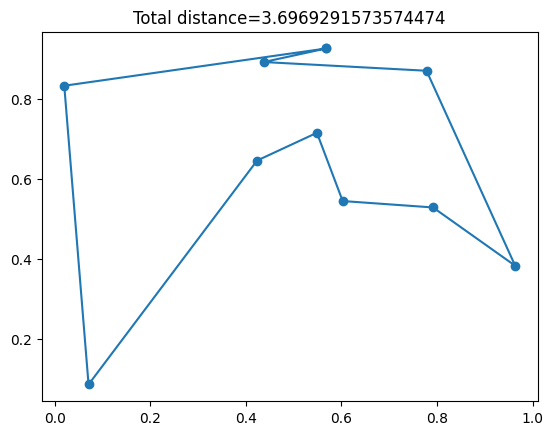

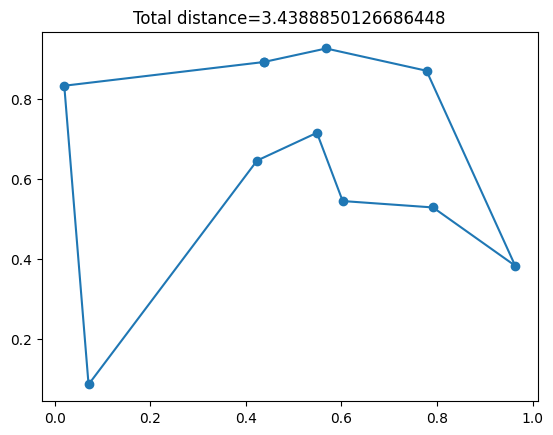

T=   0.04575 , distance=   3.43889 acc.steps=101


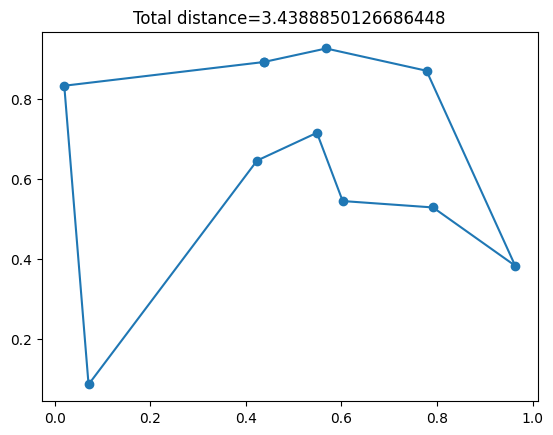

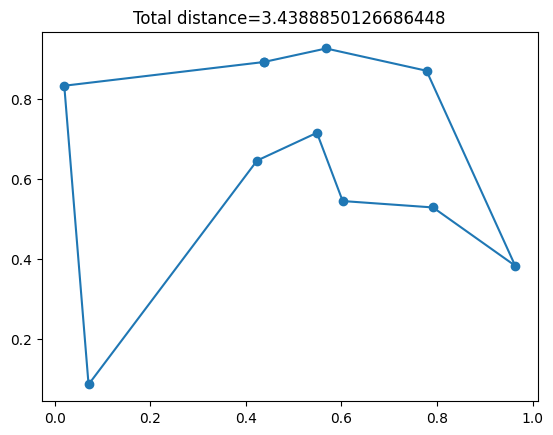

T=   0.04118 , distance=   3.43889 acc.steps=96


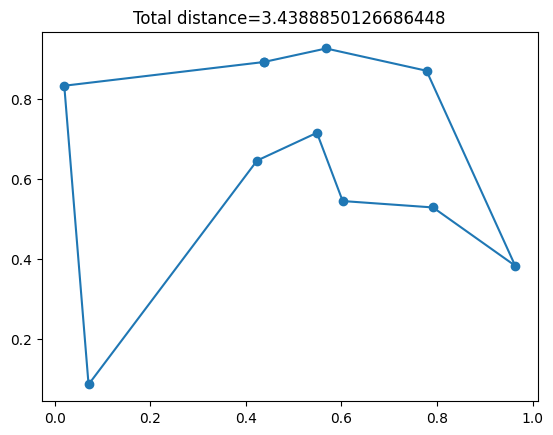

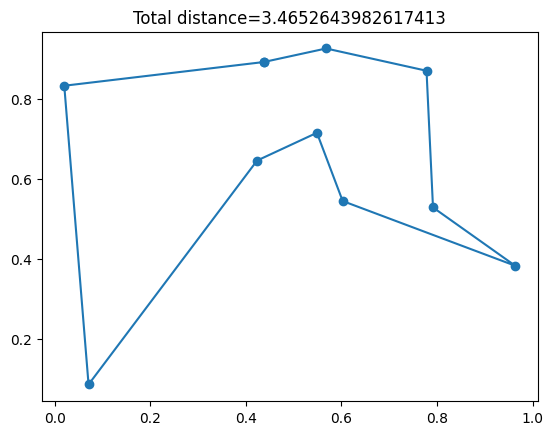

T=   0.03706 , distance=   3.46526 acc.steps=89


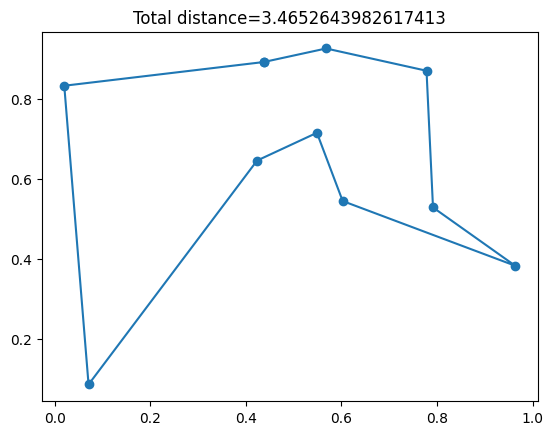

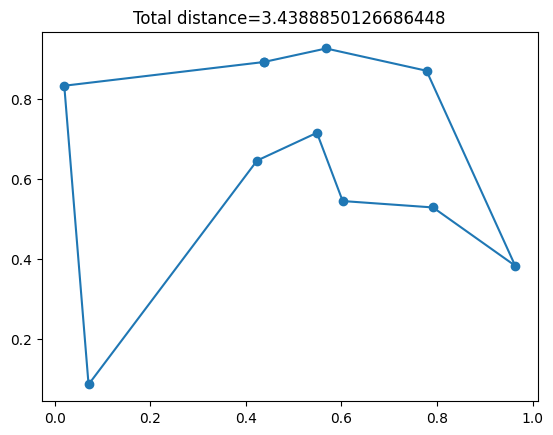

T=   0.03335 , distance=   3.43889 acc.steps=89


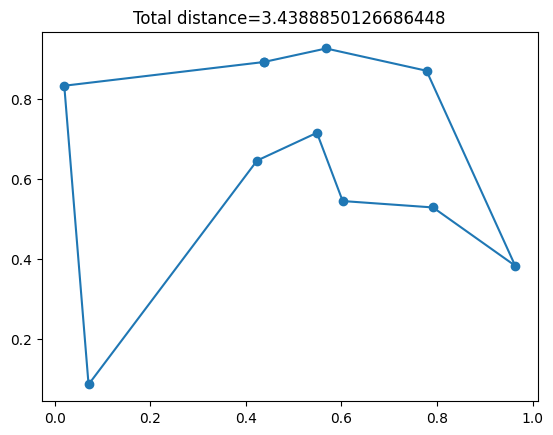

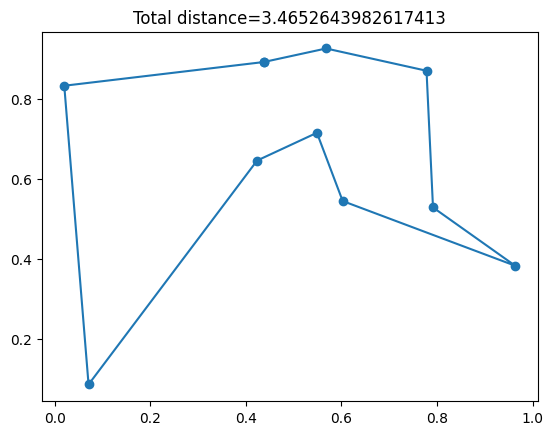

T=   0.03002 , distance=   3.46526 acc.steps=73


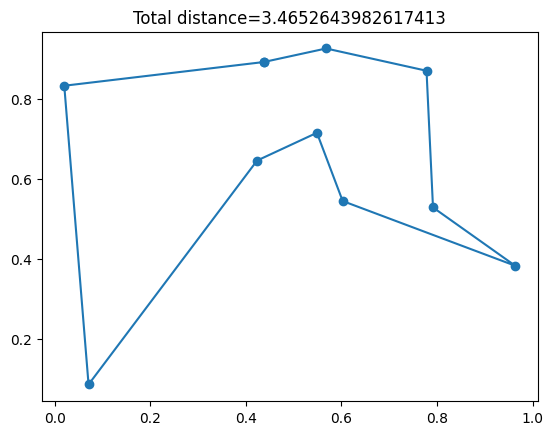

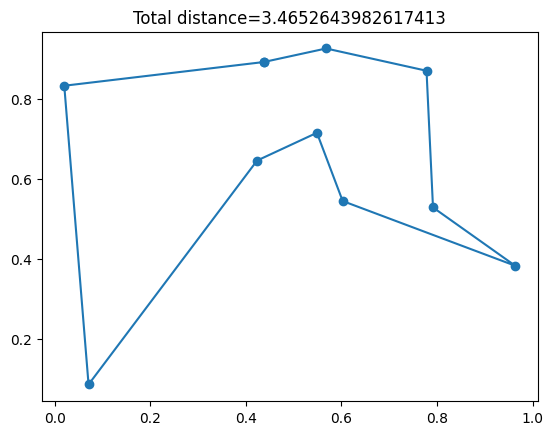

T=   0.02702 , distance=   3.46526 acc.steps=76


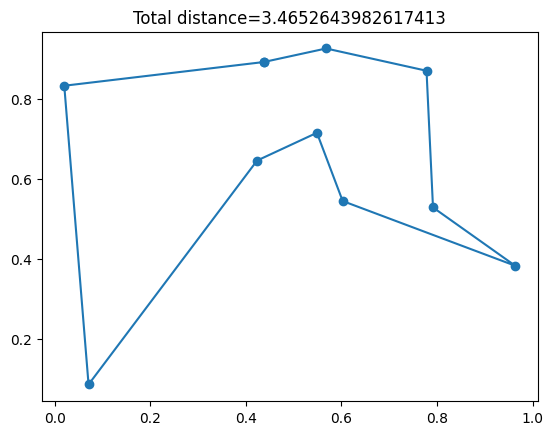

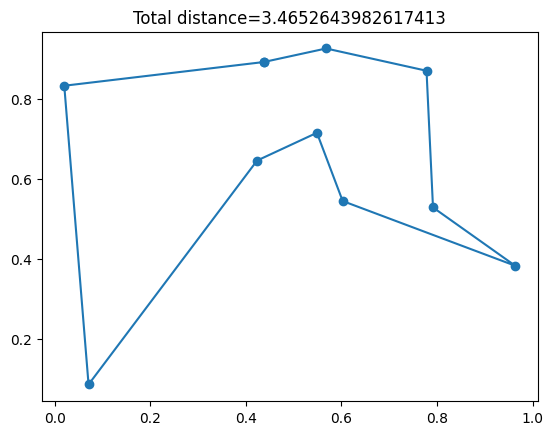

T=   0.02432 , distance=   3.46526 acc.steps=52


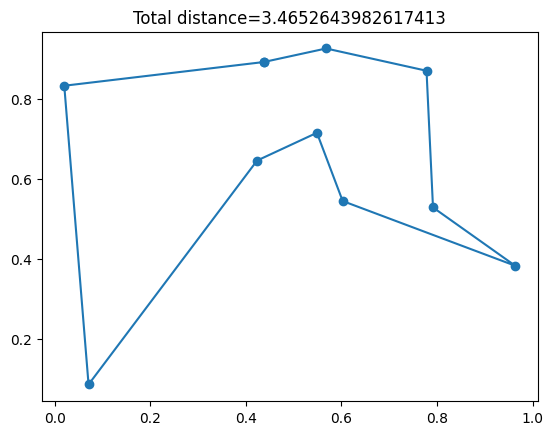

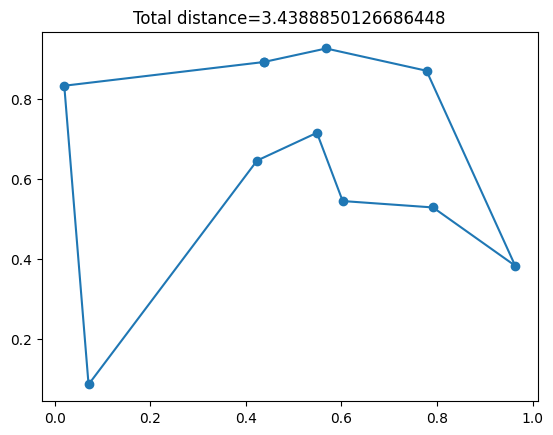

T=   0.02188 , distance=   3.43889 acc.steps=39


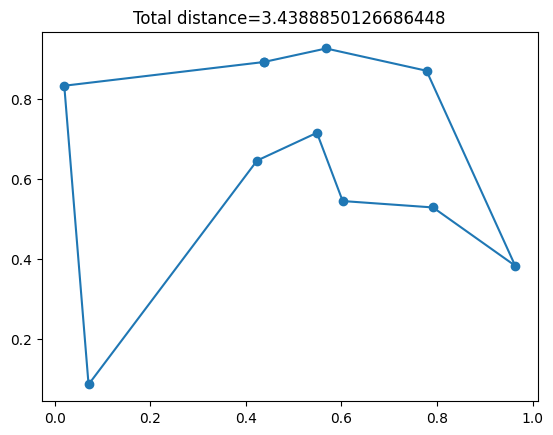

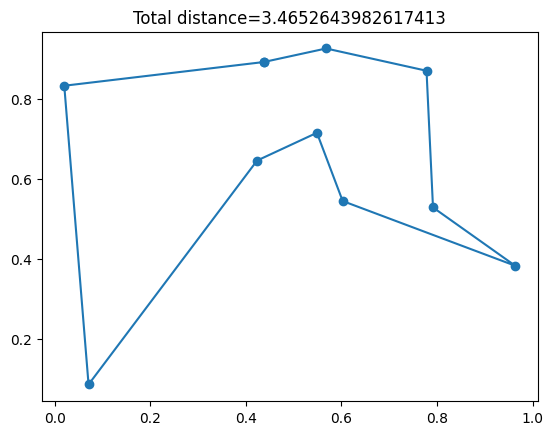

T=   0.01970 , distance=   3.46526 acc.steps=61


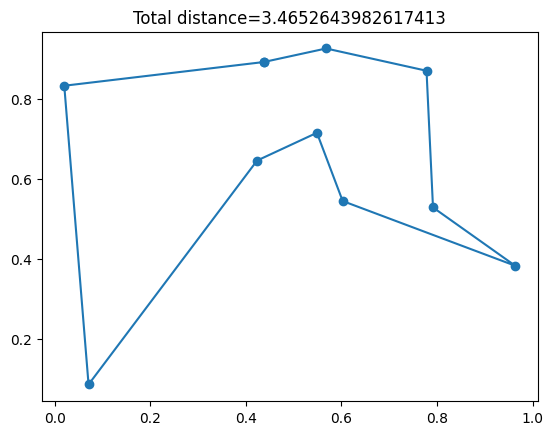

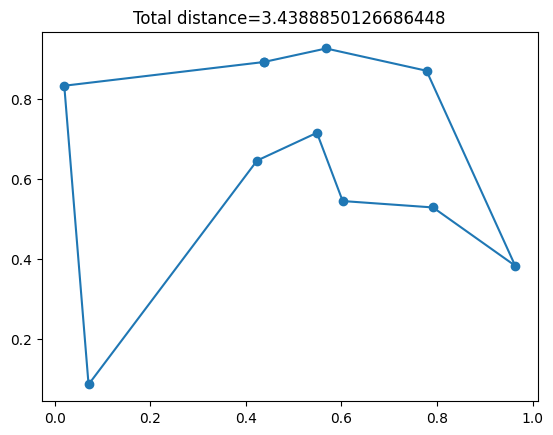

T=   0.01773 , distance=   3.43889 acc.steps=39


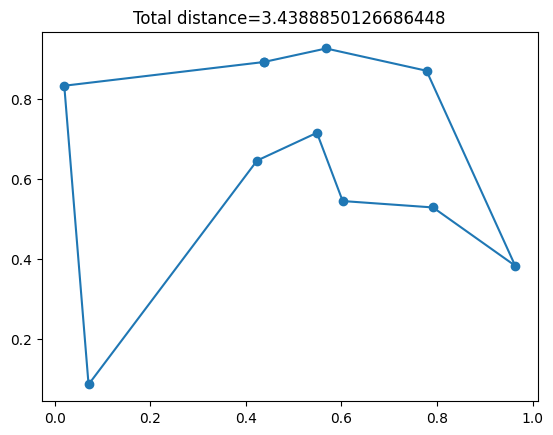

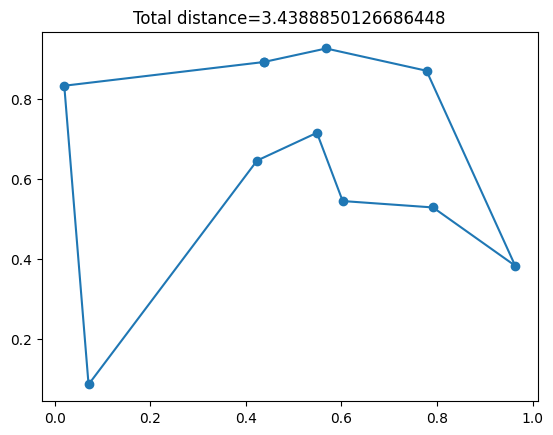

T=   0.01595 , distance=   3.43889 acc.steps=56


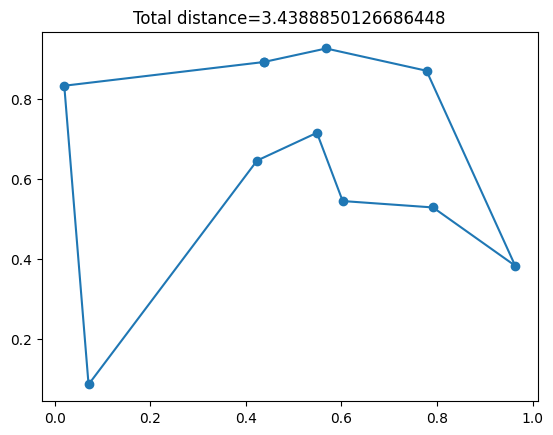

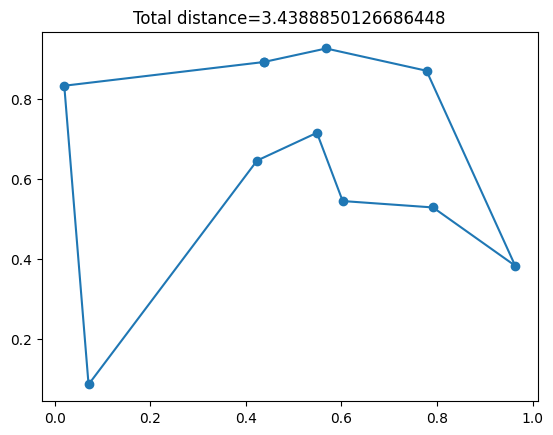

T=   0.01436 , distance=   3.43889 acc.steps=32


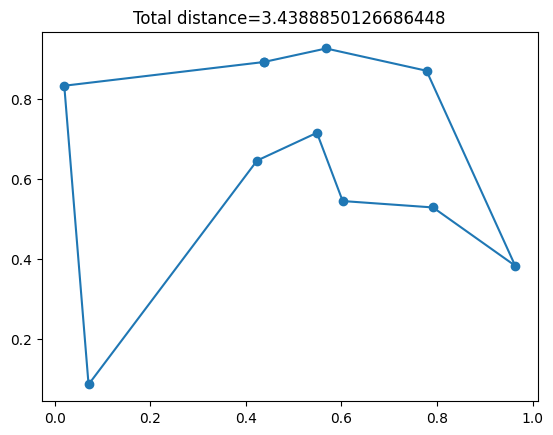

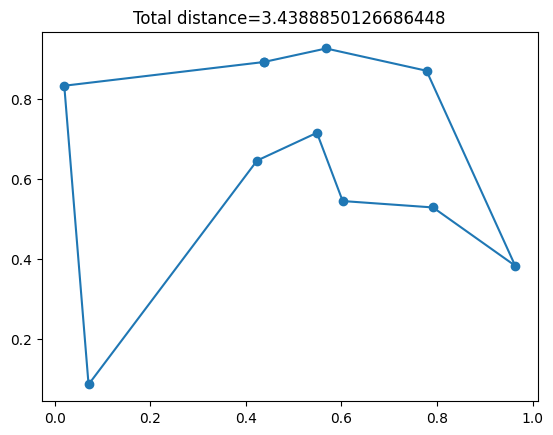

T=   0.01292 , distance=   3.43889 acc.steps=24


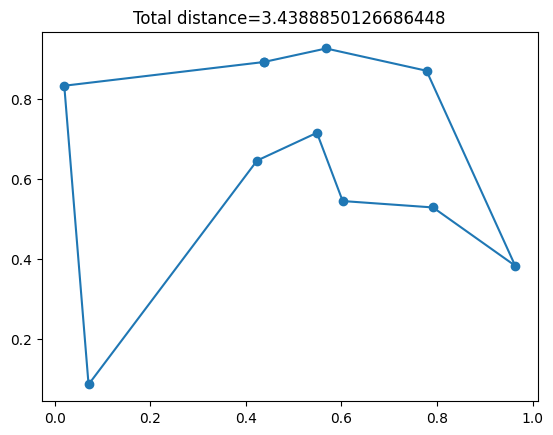

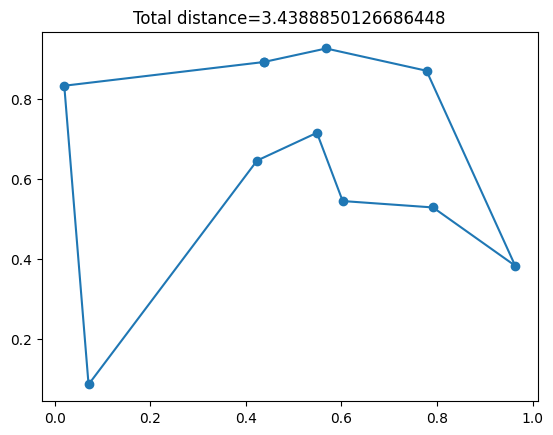

T=   0.01163 , distance=   3.43889 acc.steps=20


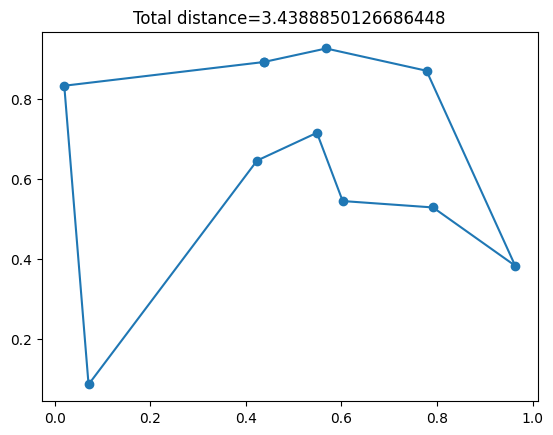

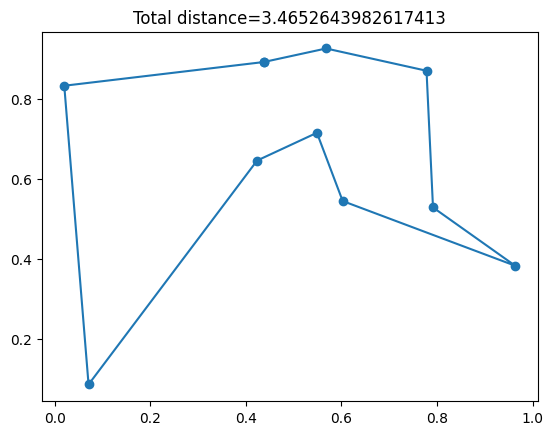

T=   0.01047 , distance=   3.46526 acc.steps=21


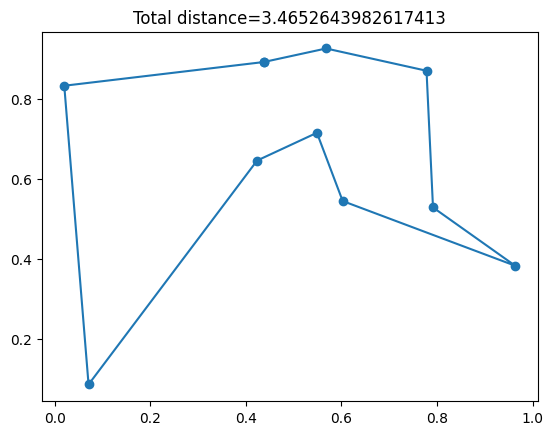

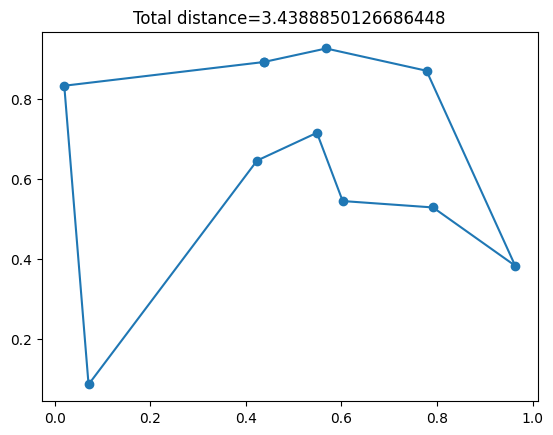

T=   0.00942 , distance=   3.43889 acc.steps=23


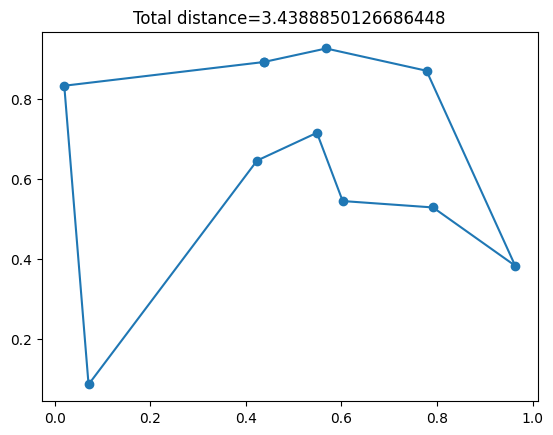

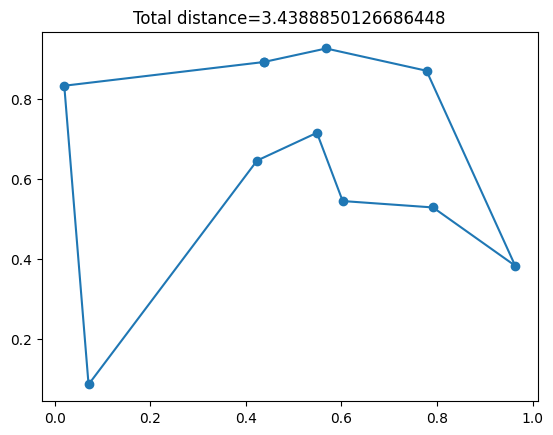

T=   0.00848 , distance=   3.43889 acc.steps=14


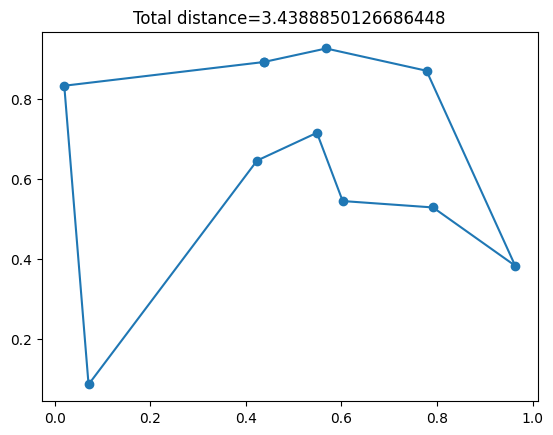

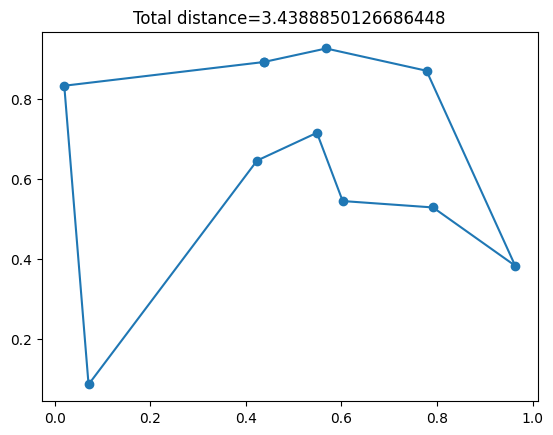

T=   0.00763 , distance=   3.43889 acc.steps=2


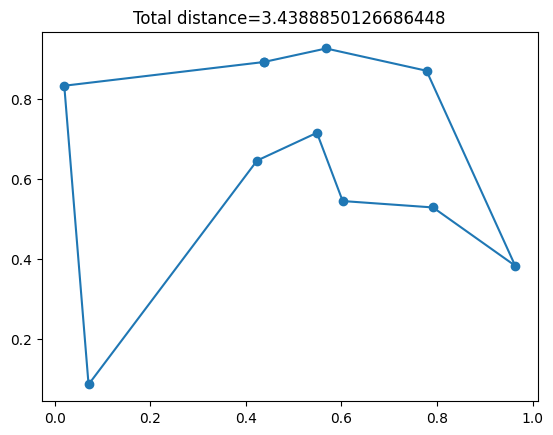

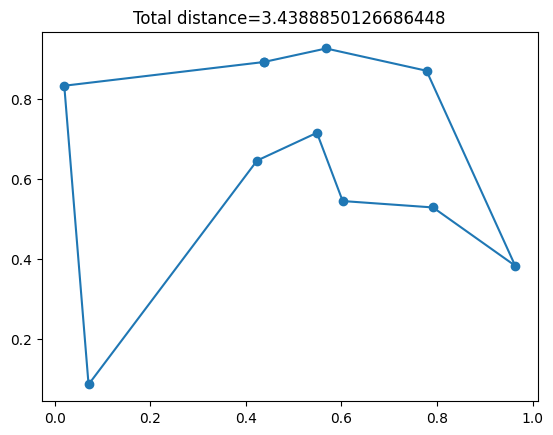

T=   0.00687 , distance=   3.43889 acc.steps=4


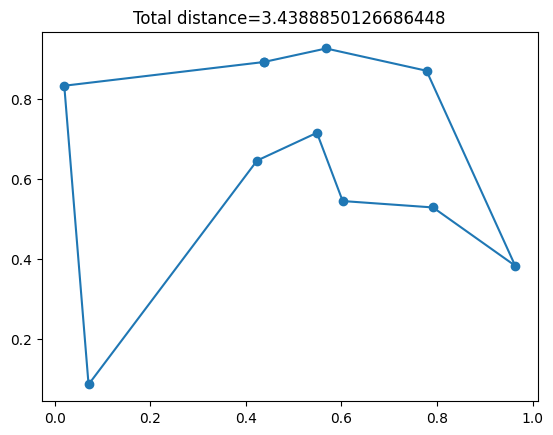

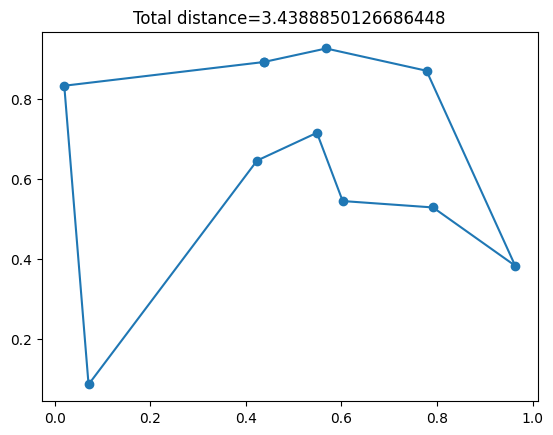

T=   0.00618 , distance=   3.43889 acc.steps=8


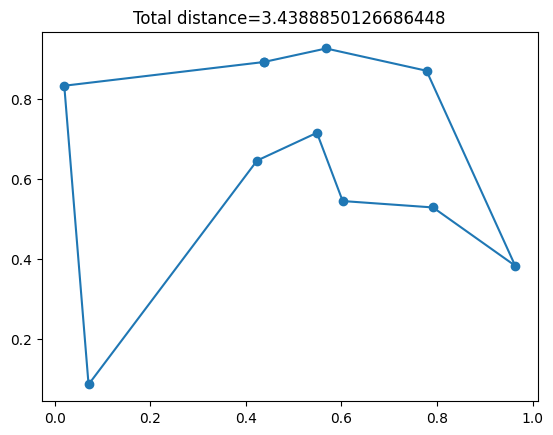

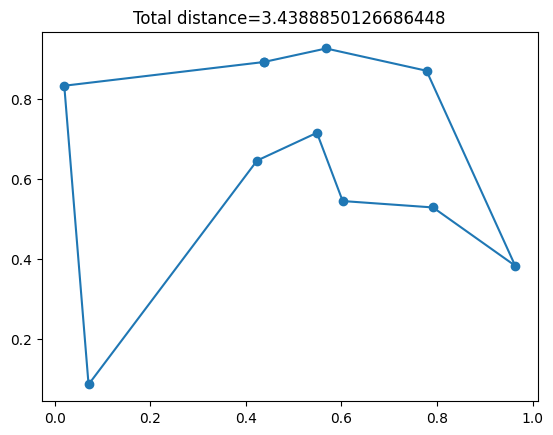

T=   0.00556 , distance=   3.43889 acc.steps=0


In [ ]:
from numpy import random

# 도시 개수 및 매개변수 설정
ncity = 10
maxSteps = 100 * ncity  # 각 온도 단계에서의 최대 시도 횟수
maxAccepted = 10 * ncity  # 각 온도 단계에서의 최대 허용된 교환 수
Tstart = 0.2  # 초기 온도
fCool = 0.9  # 냉각 비율 계수
maxTsteps = 100  # 최대 온도 단계 수

random.seed(0)  # 재현 가능성을 위한 난수 시드 설정

# 랜덤한 2D 좌표로 도시의 위치 초기화
R = random.random((ncity, 2))
# 도시를 나타내는 리스트 초기화 (순서는 무작위)
city = list(range(ncity))

# 모의 담금질 알고리즘을 사용하여 최적의 도시 순회 경로 찾기
ncity = TravelingSalesman(city, R, maxSteps, maxAccepted, Tstart, fCool, maxTsteps)